# 对泰坦尼克号数据的分析

## Question
>有哪些因素会让船上的人生还率更高？
* 生还率是否与男女比例相关
* 生还率与年龄分布的关系
* 生还率与船票等级，或者资产的关联

In [13]:
# 导入titanic-data.csv
import pandas as pd
titanic_df = pd.read_csv('titanic-data.csv')
print(len(titanic_df))
titanic_df.head()

891


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
# 划分生还者和死亡者的信息到两个df
survivor_df = titanic_df[titanic_df['Survived'] > 0]
dead_df = titanic_df[titanic_df['Survived'] == 0]
print(len(survivor_df))
print(len(dead_df))

342
549


## 生还率是否与男女比例相关?

In [18]:
# 分别计算生还者和死亡者的男女比例
male_survivor = survivor_df[survivor_df['Sex'] == 'male']
female_survivor = survivor_df[survivor_df['Sex'] == 'female']
male_dead = dead_df[dead_df['Sex'] == 'male']
female_dead = dead_df[dead_df['Sex'] == 'female']
print(len(male_survivor))
print(len(female_survivor))
print(len(male_dead))
print(len(female_dead))

109
233
468
81


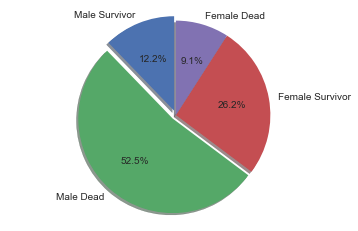

In [26]:
# 绘制直方图
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

labels = 'Male Survivor', 'Male Dead', 'Female Survivor', 'Female Dead'
sizes = [len(male_survivor), len(male_dead), len(female_survivor), len(female_dead)]
explode = (0.05, 0.05, 0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()